# Plotting activation functions for DNNs

This notebook was created in preparation for my master's thesis. These are the activation functions I will be outlining, as well as their introductions. See the [papers][1] page for the links to the actual papers.

**Sigmoid** as presented in [A1]

\begin{equation}
S(x) = \frac{1}{1 + e^{-x}}
\end{equation}


**Tanh** as presented in [A1]

\begin{equation}
tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}
\end{equation}

**Softsign** as presented in [A2]

\begin{equation}
softsign(x) = \frac{x}{1 + |x|}
\end{equation}

**ReLU** as presented in [A3]

\begin{equation}
ReLU(x) =
\begin{cases}
x,  & \text{if $X > 0$} \\
0, & \text{otherwise}
\end{cases}
\end{equation}

**LReLU/PReLU** as presented in [A4]/[A5]

\begin{equation}
ReLU(x) =
\begin{cases}
x,  & \text{if $X > 0$} \\
\alpha x, & \text{otherwise, }0 \leq \alpha \leq 1
\end{cases}
\end{equation}

[1]:https://github.com/claymcleod/opendnn/tree/master/papers

Saved to nonlinears


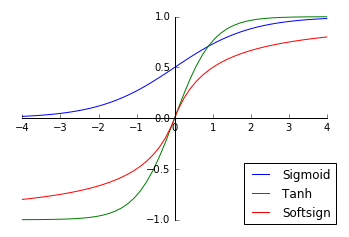

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def softsign(x):
    return x / (1 + np.abs(x))

def relu(x):
    return np.select([x > 0, x <= 0], [x, 0])

def lrelu(x, alpha):
    return np.select([x > 0, x <= 0], [x, x*alpha])

def plot_fn(fn, legend=None, save_name=None, min_x=-4, max_x=4):
    x=np.linspace(min_x, max_x)
    
    plt.clf()
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    if not isinstance(fn, list):
        fn = [fn]
    
    for f in fn:
        plt.plot(x, f(x))
        
    if legend:
        plt.legend(legend, loc=4)
        
    if save_name:
        print("Saved to {}".format(save_name))
        plt.savefig(save_name)
        
    plt.show()
    
# Uncomment any of these that you like!

#plot_fn(sigmoid)
#plot_fn(tanh)
#plot_fn(softsign)
#plot_fn(relu)
plot_fn([sigmoid, tanh, softsign], legend=["Sigmoid", "Tanh", "Softsign"], save_name="nonlinears")
#plot_fn([relu, partial(lrelu, alpha=0.25), partial(lrelu, alpha=0.5)], legend=["a=0", "a=0.25", "a=0.5"], save_name="lrelus")